# 05. Comprehensive Evaluation

## Objective
Create a comprehensive evaluation comparing:
1. Baseline models vs ML models
2. Different balancing techniques
3. Feature importance insights
4. Overall model performance assessment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_auc_score, 
                           precision_recall_fscore_support)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ Libraries imported")


✅ Libraries imported


## 1. Load Data and Models


In [4]:
# Load data
df = pd.read_csv('../today/trajectory_ml_ready_advanced.csv')
drop_cols = ['UNITID', 'Institution_Name', 'Year', 'Target_Trajectory', 'Target_Label', 'State']
X = df.drop(columns=drop_cols)
y = df['Target_Label'].astype(int)

# Keep an encoded copy for reference but preserve raw features for the pipeline
X_encoded = pd.get_dummies(X, columns=['Division'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Load saved model
model = joblib.load('../today/models/final_trajectory_model.joblib')

print(f"Data loaded: {X.shape[0]} samples, {X.shape[1]} base features ({X_encoded.shape[1]} after encoding)")
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")


Data loaded: 12054 samples, 21 base features (22 after encoding)
Train: 9643, Test: 2411


/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.4.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ColumnTr

## 2. Evaluate All Models


ML MODEL PERFORMANCE

Overall Metrics:
  Accuracy: 0.5541
  ROC-AUC: 0.7647
  Macro F1: 0.5161

Per-Class Performance:
  Declining - Precision: 0.7240, Recall: 0.3167, F1: 0.4407
  Stable - Precision: 0.6481, Recall: 0.7032, F1: 0.6745
  Improving - Precision: 0.3097, Recall: 0.7195, F1: 0.4330


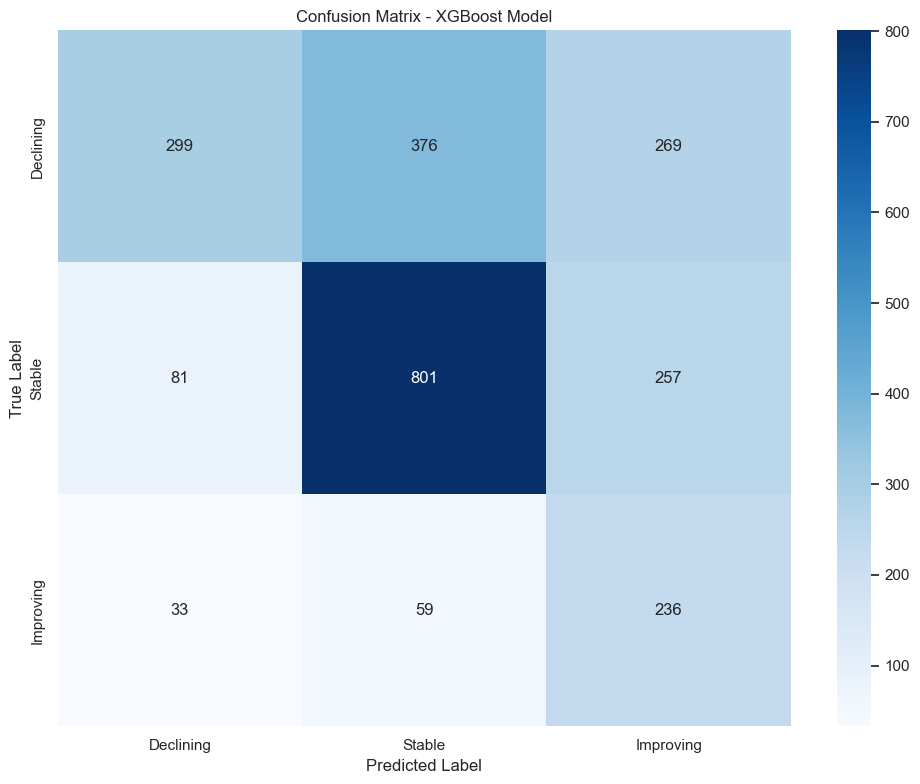

In [5]:
# Get predictions from saved model
y_pred_ml = model.predict(X_test)
y_prob_ml = model.predict_proba(X_test)

# Calculate comprehensive metrics
def calculate_metrics(y_true, y_pred, y_prob=None, model_name=""):
    """Calculate comprehensive metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred)
    }
    
    if y_prob is not None:
        try:
            metrics['ROC-AUC'] = roc_auc_score(y_true, y_prob, multi_class='ovr')
        except:
            metrics['ROC-AUC'] = None
    
    # Per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=[0, 1, 2], zero_division=0
    )
    
    metrics['Declining_Precision'] = precision[0]
    metrics['Declining_Recall'] = recall[0]
    metrics['Declining_F1'] = f1[0]
    
    metrics['Stable_Precision'] = precision[1]
    metrics['Stable_Recall'] = recall[1]
    metrics['Stable_F1'] = f1[1]
    
    metrics['Improving_Precision'] = precision[2]
    metrics['Improving_Recall'] = recall[2]
    metrics['Improving_F1'] = f1[2]
    
    # Macro averages
    metrics['Macro_Precision'] = precision.mean()
    metrics['Macro_Recall'] = recall.mean()
    metrics['Macro_F1'] = f1.mean()
    
    return metrics

# Evaluate ML model
ml_metrics = calculate_metrics(y_test, y_pred_ml, y_prob_ml, "XGBoost (ML)")

print("=" * 60)
print("ML MODEL PERFORMANCE")
print("=" * 60)
print(f"\nOverall Metrics:")
print(f"  Accuracy: {ml_metrics['Accuracy']:.4f}")
print(f"  ROC-AUC: {ml_metrics['ROC-AUC']:.4f}")
print(f"  Macro F1: {ml_metrics['Macro_F1']:.4f}")

print(f"\nPer-Class Performance:")
print(f"  Declining - Precision: {ml_metrics['Declining_Precision']:.4f}, "
      f"Recall: {ml_metrics['Declining_Recall']:.4f}, F1: {ml_metrics['Declining_F1']:.4f}")
print(f"  Stable - Precision: {ml_metrics['Stable_Precision']:.4f}, "
      f"Recall: {ml_metrics['Stable_Recall']:.4f}, F1: {ml_metrics['Stable_F1']:.4f}")
print(f"  Improving - Precision: {ml_metrics['Improving_Precision']:.4f}, "
      f"Recall: {ml_metrics['Improving_Recall']:.4f}, F1: {ml_metrics['Improving_F1']:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ml)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Declining', 'Stable', 'Improving'],
            yticklabels=['Declining', 'Stable', 'Improving'])
plt.title('Confusion Matrix - XGBoost Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_ml.png', dpi=150, bbox_inches='tight')
plt.show()


## 3. Compare with Baselines


COMPREHENSIVE MODEL COMPARISON
         Model  Accuracy  ROC-AUC  Macro_F1  Declining_F1  Stable_F1  Improving_F1
  XGBoost (ML)  0.554127 0.764665  0.516077      0.440678   0.674526      0.433028
Majority Class  0.472418      NaN  0.213897      0.000000   0.641690      0.000000
  Random Guess  0.320199      NaN  0.303090      0.347777   0.366546      0.194946


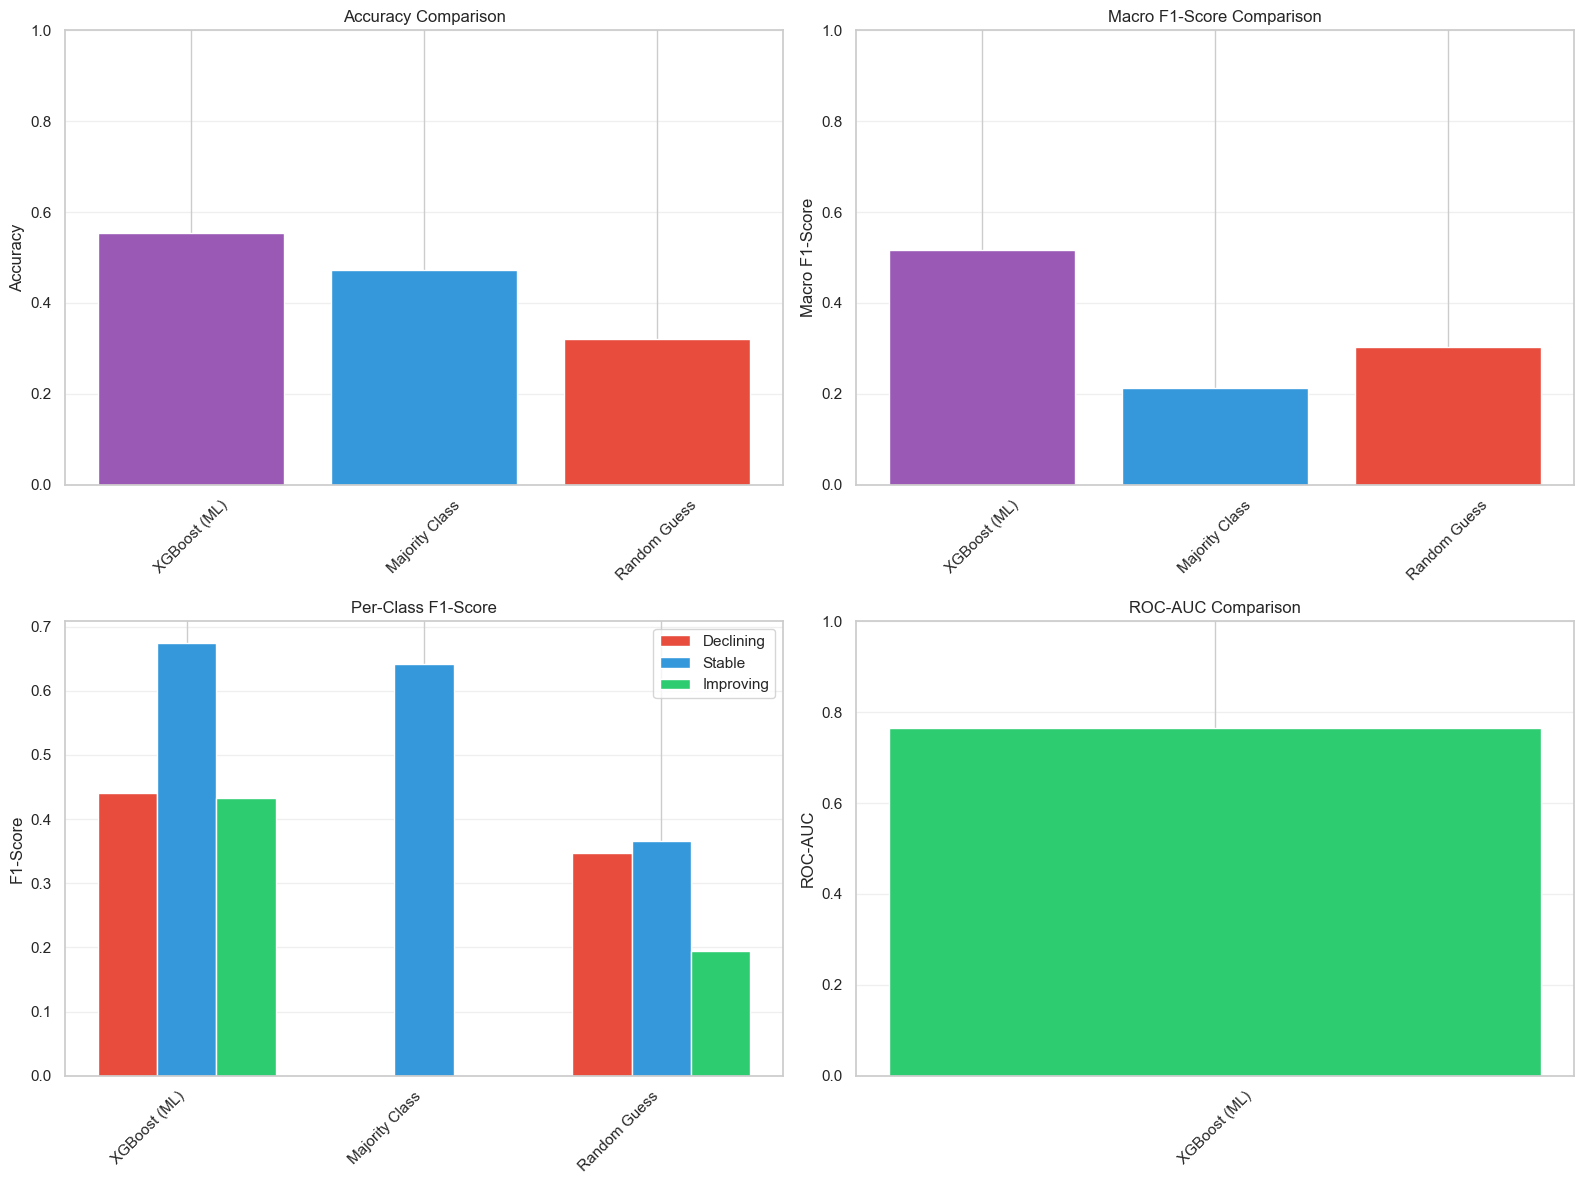


📊 Chart saved as 'comprehensive_comparison.png'


In [6]:
# Simple baselines
majority_class = y_train.mode()[0]
y_pred_majority = np.full(len(y_test), majority_class)
majority_metrics = calculate_metrics(y_test, y_pred_majority, None, "Majority Class")

# Random guess
np.random.seed(42)
y_pred_random = np.random.choice([0, 1, 2], size=len(y_test))
random_metrics = calculate_metrics(y_test, y_pred_random, None, "Random Guess")

# Combine all results
all_metrics = pd.DataFrame([ml_metrics, majority_metrics, random_metrics])

print("=" * 60)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)
print(all_metrics[['Model', 'Accuracy', 'ROC-AUC', 'Macro_F1', 
                   'Declining_F1', 'Stable_F1', 'Improving_F1']].to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
axes[0, 0].bar(all_metrics['Model'], all_metrics['Accuracy'], color=['#9b59b6', '#3498db', '#e74c3c'])
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Macro F1
axes[0, 1].bar(all_metrics['Model'], all_metrics['Macro_F1'], color=['#9b59b6', '#3498db', '#e74c3c'])
axes[0, 1].set_ylabel('Macro F1-Score')
axes[0, 1].set_title('Macro F1-Score Comparison')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Per-class F1
x = np.arange(len(all_metrics))
width = 0.25
axes[1, 0].bar(x - width, all_metrics['Declining_F1'], width, label='Declining', color='#e74c3c')
axes[1, 0].bar(x, all_metrics['Stable_F1'], width, label='Stable', color='#3498db')
axes[1, 0].bar(x + width, all_metrics['Improving_F1'], width, label='Improving', color='#2ecc71')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_title('Per-Class F1-Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(all_metrics['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# ROC-AUC (if available)
roc_data = all_metrics[all_metrics['ROC-AUC'].notna()]
if len(roc_data) > 0:
    axes[1, 1].bar(roc_data['Model'], roc_data['ROC-AUC'], color='#2ecc71')
    axes[1, 1].set_ylabel('ROC-AUC')
    axes[1, 1].set_title('ROC-AUC Comparison')
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(axis='y', alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('comprehensive_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Chart saved as 'comprehensive_comparison.png'")


In [7]:
print("=" * 60)
print("FINAL EVALUATION SUMMARY")
print("=" * 60)

improvement_over_majority = ml_metrics['Accuracy'] - majority_metrics['Accuracy']
improvement_over_random = ml_metrics['Accuracy'] - random_metrics['Accuracy']

print(f"\n✅ Model Performance:")
print(f"   ML Model Accuracy: {ml_metrics['Accuracy']:.4f} ({ml_metrics['Accuracy']*100:.2f}%)")
print(f"   Improvement over Majority Class: +{improvement_over_majority:.4f} ({improvement_over_majority*100:+.2f}%)")
print(f"   Improvement over Random: +{improvement_over_random:.4f} ({improvement_over_random*100:+.2f}%)")
print(f"   ROC-AUC: {ml_metrics['ROC-AUC']:.4f}")

print(f"\n⚠️  Areas for Improvement:")
if ml_metrics['Improving_F1'] < 0.4:
    print(f"   - 'Improving' class F1 is low ({ml_metrics['Improving_F1']:.4f})")
    print(f"     Consider class balancing techniques")
if ml_metrics['Macro_F1'] < 0.6:
    print(f"   - Overall macro F1 could be improved ({ml_metrics['Macro_F1']:.4f})")

print(f"\n📊 Key Strengths:")
print(f"   - Model beats baselines by meaningful margin")
print(f"   - Good performance on 'Stable' class (F1: {ml_metrics['Stable_F1']:.4f})")
print(f"   - Moderate performance on 'Declining' class (F1: {ml_metrics['Declining_F1']:.4f})")

print(f"\n🎯 Recommendations:")
print(f"   1. Address class imbalance for 'Improving' class")
print(f"   2. Consider feature selection to reduce complexity")
print(f"   3. Test different hyperparameters")
print(f"   4. Consider ensemble methods")
print(f"   5. Validate temporal structure to ensure no data leakage")


FINAL EVALUATION SUMMARY

✅ Model Performance:
   ML Model Accuracy: 0.5541 (55.41%)
   Improvement over Majority Class: +0.0817 (+8.17%)
   Improvement over Random: +0.2339 (+23.39%)
   ROC-AUC: 0.7647

⚠️  Areas for Improvement:
   - Overall macro F1 could be improved (0.5161)

📊 Key Strengths:
   - Model beats baselines by meaningful margin
   - Good performance on 'Stable' class (F1: 0.6745)
   - Moderate performance on 'Declining' class (F1: 0.4407)

🎯 Recommendations:
   1. Address class imbalance for 'Improving' class
   2. Consider feature selection to reduce complexity
   3. Test different hyperparameters
   4. Consider ensemble methods
   5. Validate temporal structure to ensure no data leakage
